**Imports**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings("ignore") #don't display warnings

In [7]:
pd.set_option('display.max_rows', None) #to display all the output 

**Read data**

In [12]:
df = pd.read_csv('data/train.csv')
df = df.drop(columns = 'Id')

In [14]:
df.shape

(1460, 80)

**missing data \& number of missing values**

In [17]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

***check datatypes for each column*** 

In [19]:
df.dtypes #the ouput will display the type of each column
df.dtypes.unique() #also, this line will help us, when we'll separate numerical and categorical values.

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

***Identify numeric columns & build distribution histograms***

In [22]:
#first, let's identify numeric columns.
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.isna().sum() #check missing values

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

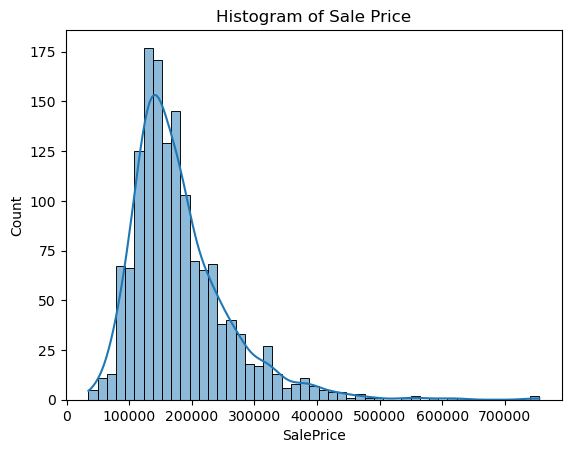

In [26]:
#Second, let's plot the distribution histogram of the sale price, because the saleprice is our target variable, 
sns.histplot(numerical_df["SalePrice"], kde = True)
plt.title("Histogram of Sale Price") 
#plt.savefig("histogram_saleprice.png")
plt.show()

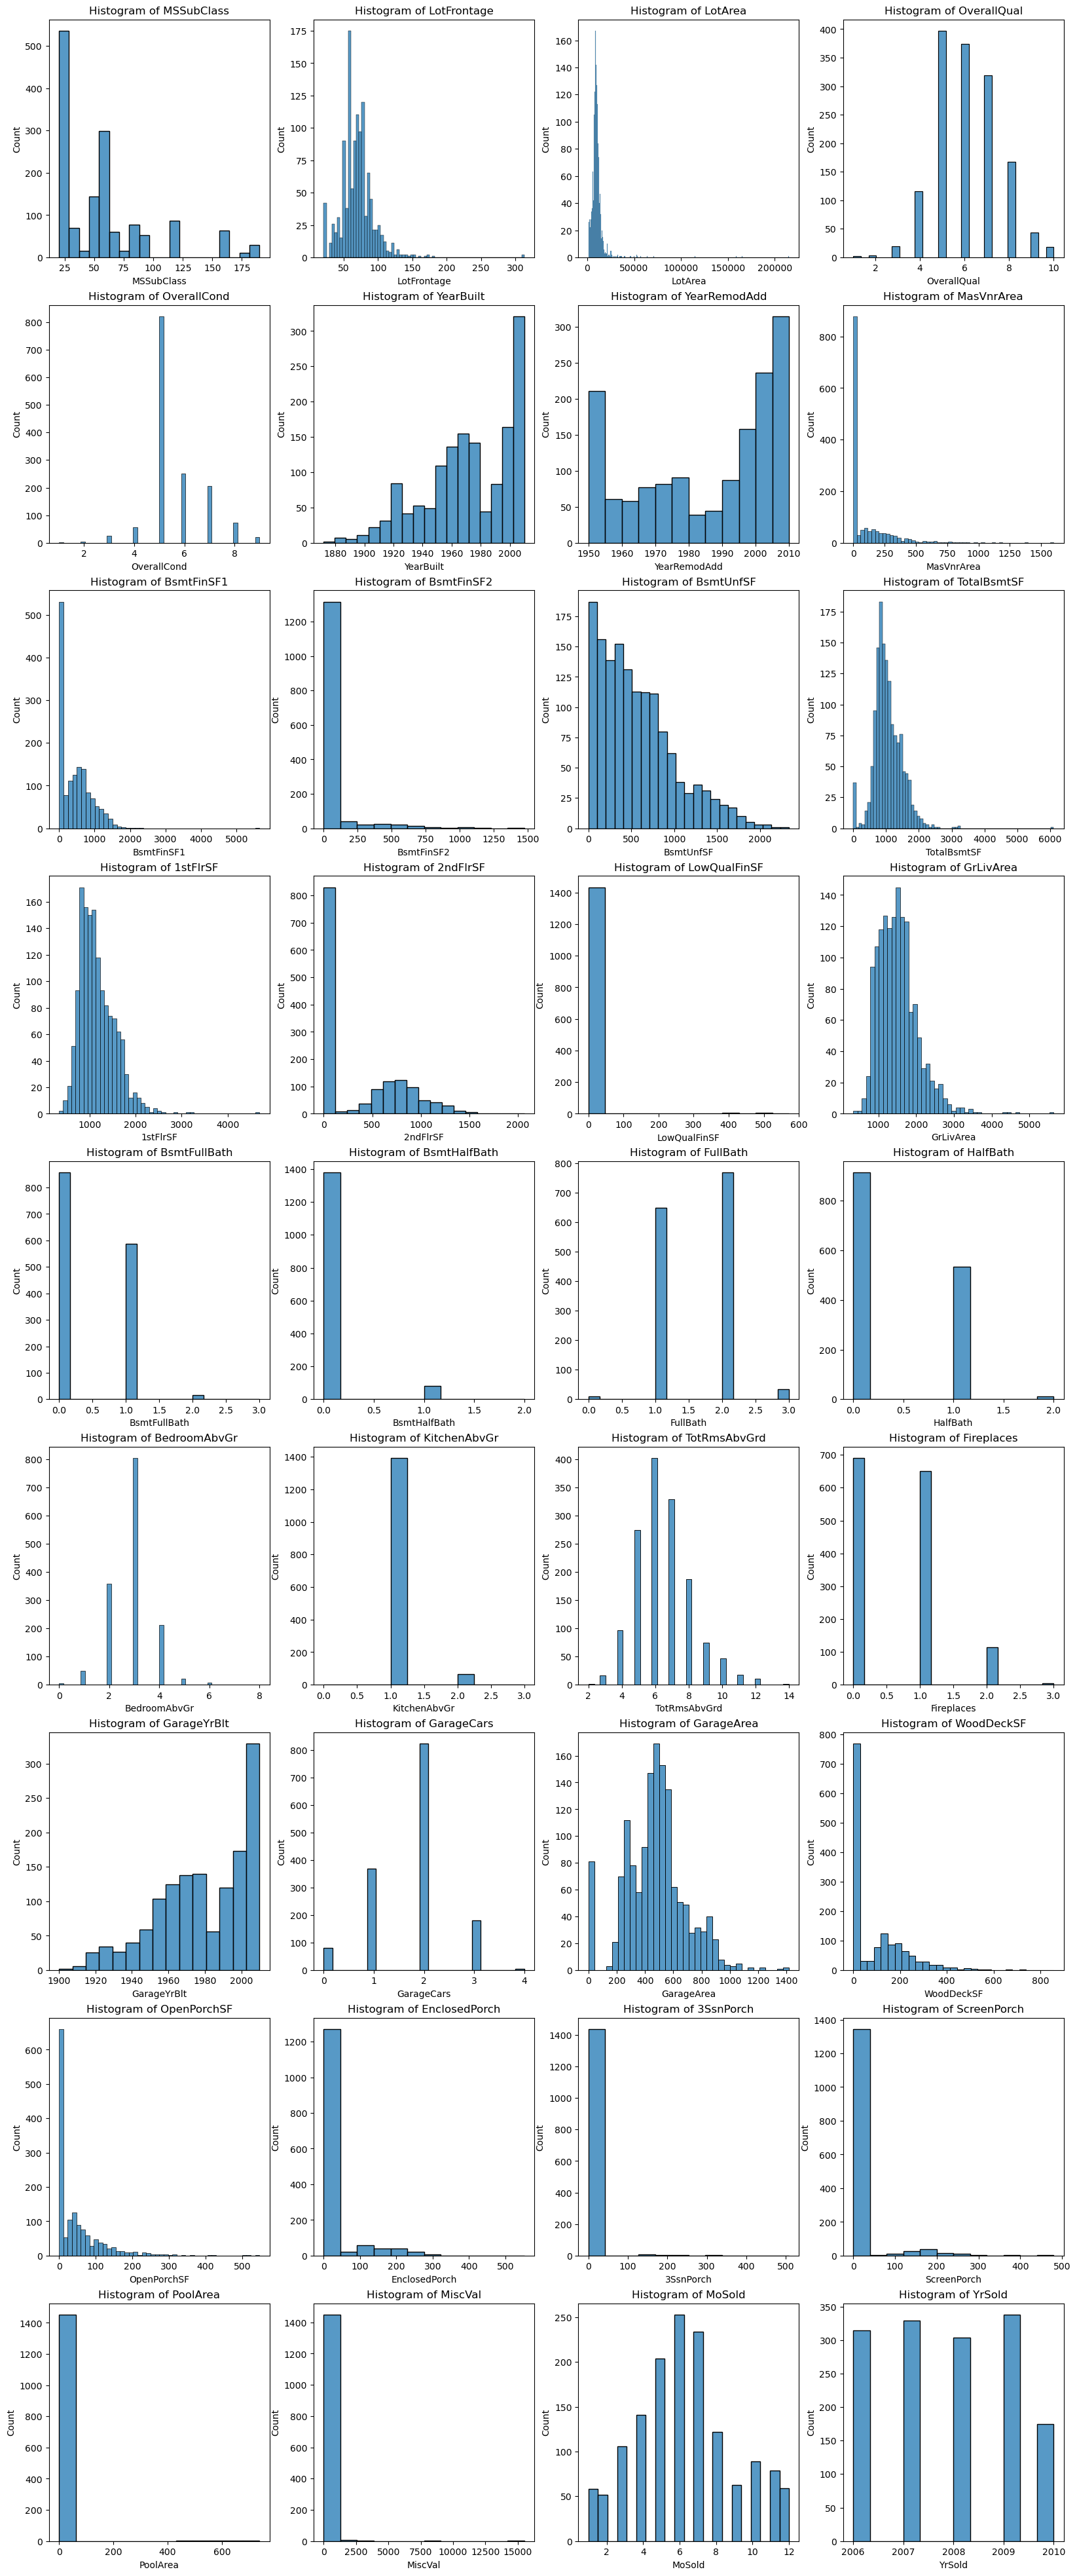

In [28]:
#Now, lets build distribution histograms of the rest of the numerical columns
numerical_df_ = numerical_df.drop(columns = 'SalePrice')
fig, axes = plt.subplots(9,4, figsize=(20, 50))
axes = axes.flatten() #Our axes are a 2D array (since we created 9 rows and 4 columns). So we need to flatten it first.

for i, col in enumerate(numerical_df_.columns):
    sns.histplot(numerical_df_[col], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.show()

***Identify categorical columns and generate frequency distribution histogram***

In [31]:
#first, let's identify categorical columns.
categorical_df = df.select_dtypes("object") 

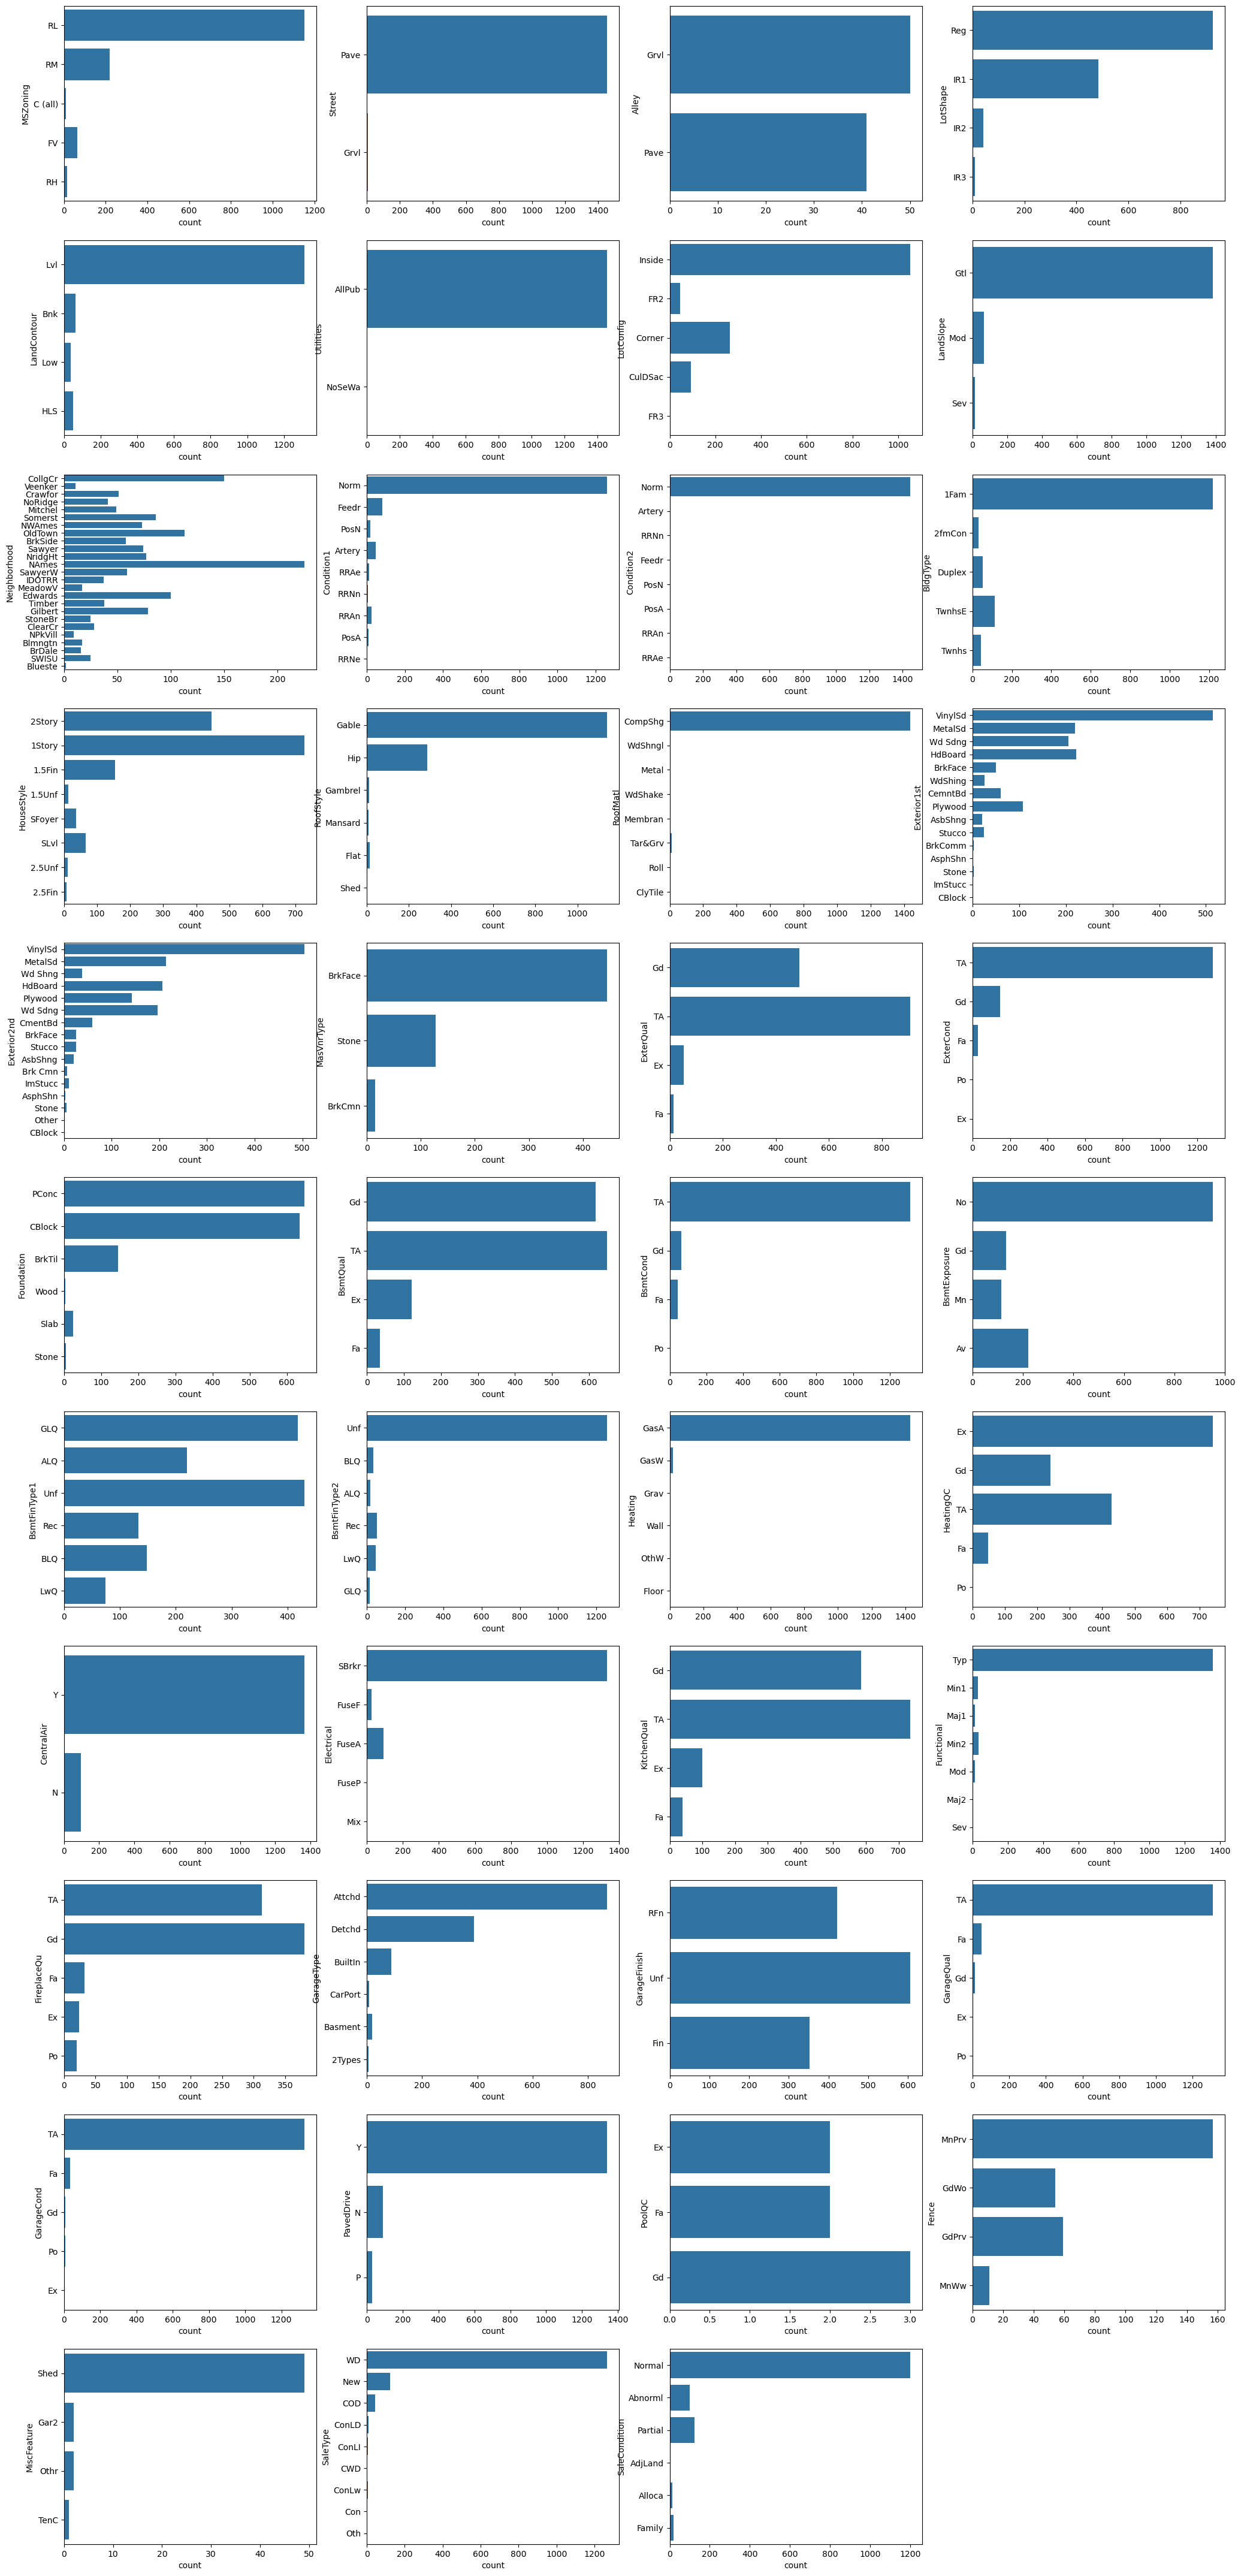

In [33]:
#Now, lets build frequency distrubution histogram of our categorical columns
fig, axes = plt.subplots(11,4, figsize=(25, 55))
axes = axes.flatten() #Our axes are a 2D array (since we created 9 rows and 4 columns). So we need to flatten it first.

for i, col in enumerate(categorical_df.columns):
    sns.countplot(categorical_df[col], ax=axes[i])
    #axes[i].set_title(f'Frequency Distribution of {col}')
axes[-1].axis('off') #since we don't the last figure
plt.show()

***3.1 Detect Outliers***

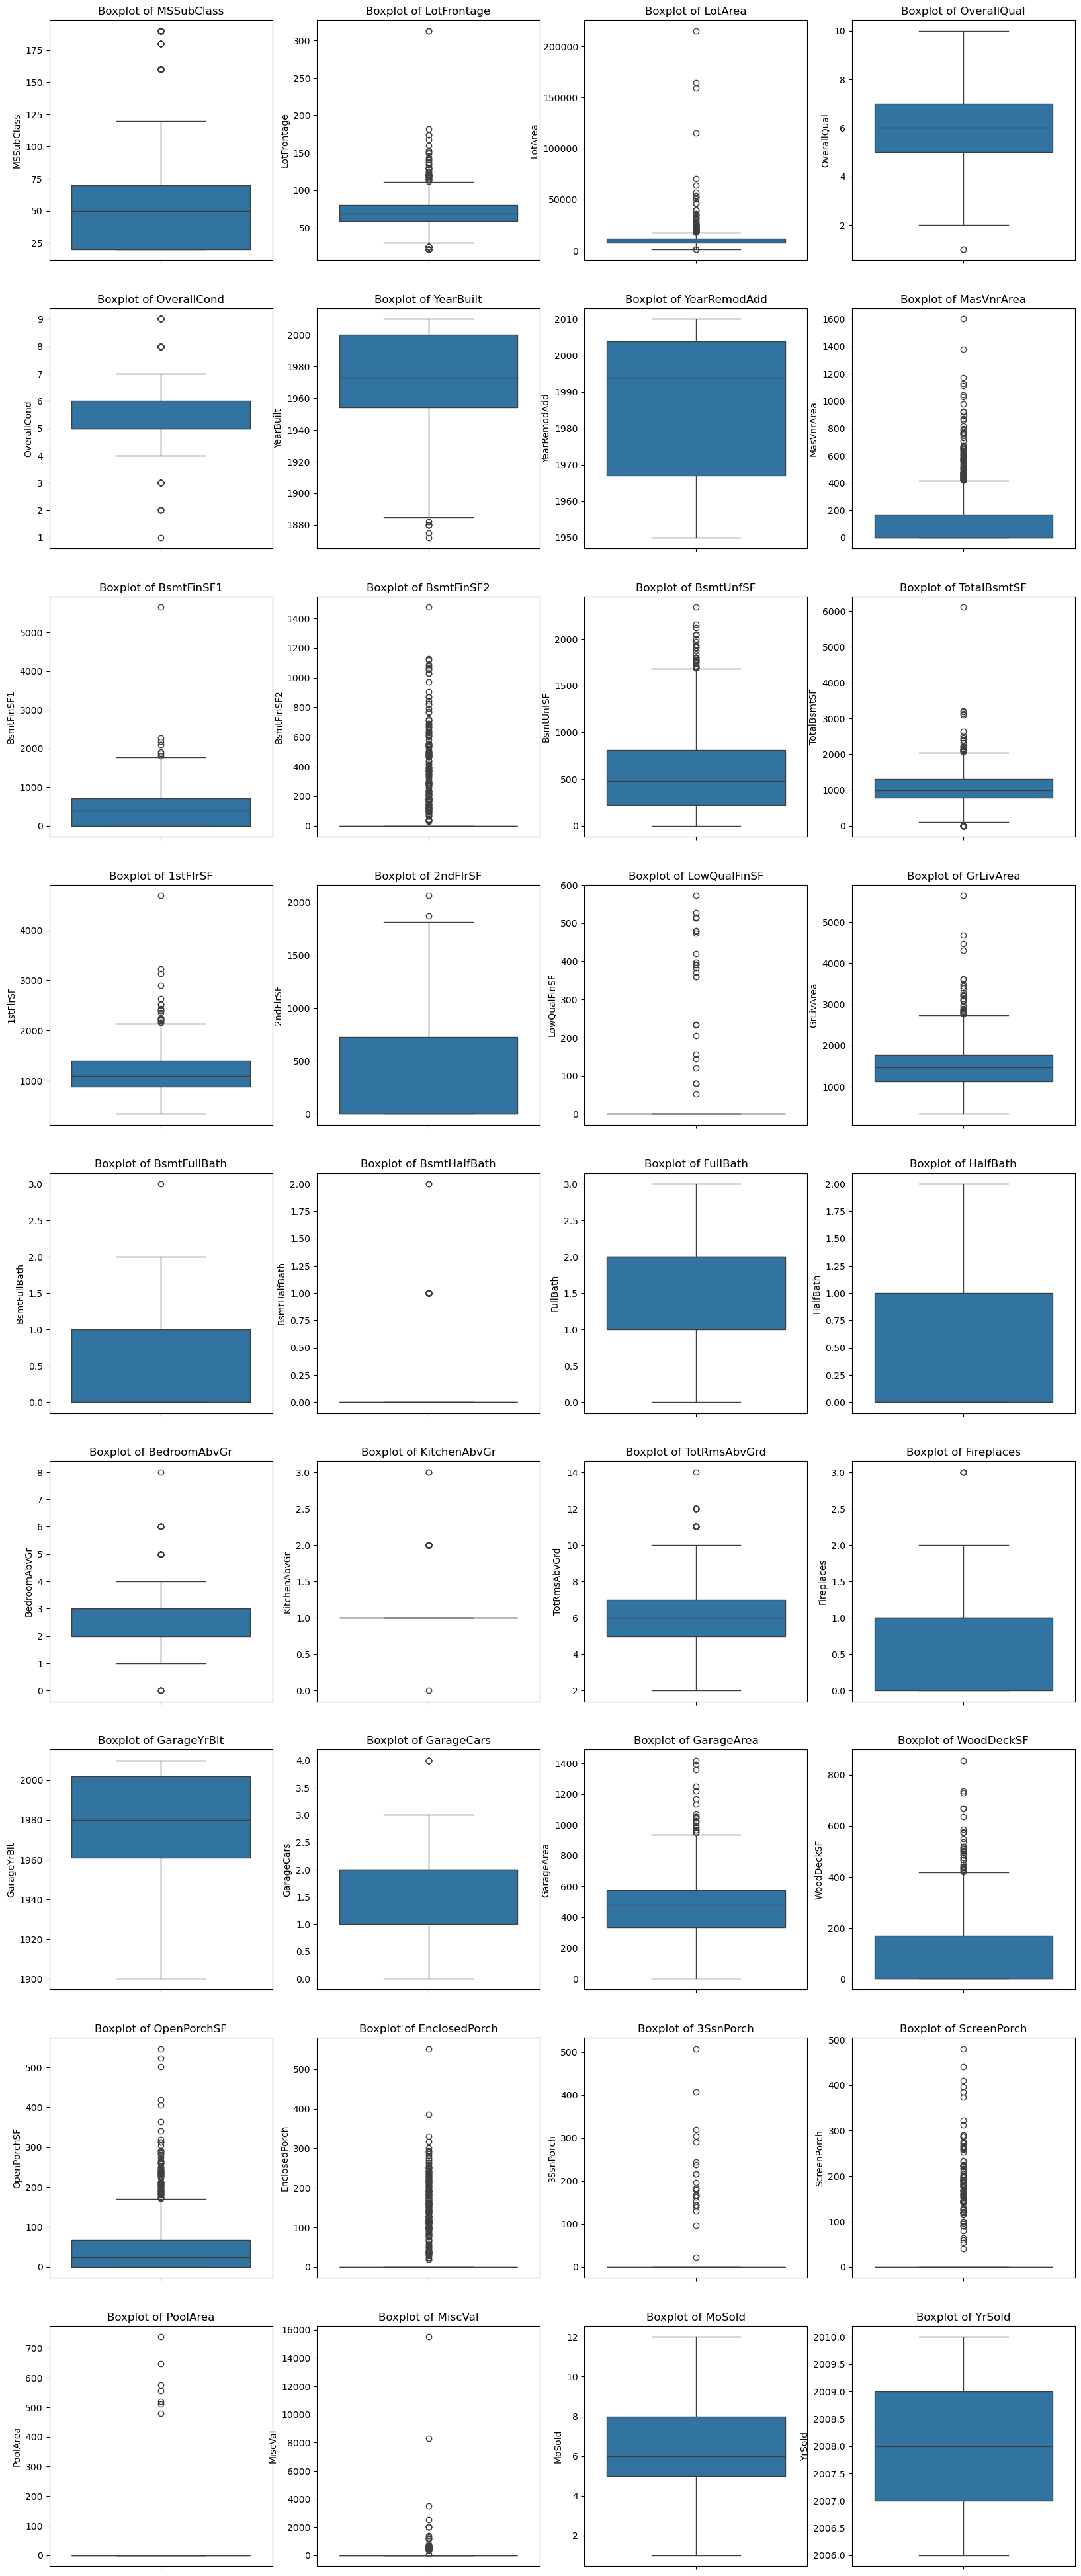

In [36]:
fig, axes = plt.subplots(9,4, figsize=(20, 50))
axes = axes.flatten() #Our axes are a 2D array (since we created 9 rows and 4 columns). So we need to flatten it first.

for i, col in enumerate(numerical_df_.columns):
    sns.boxplot(numerical_df_[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.savefig("Boxplot_.png")